In [1]:
pip install requests beautifulsoup4 yfinance pandas pytz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


MMM done :)
AOS done :)
ABT done :)
ABBV done :)
ACN done :)
ADM done :)
ADBE done :)
ADP done :)
AES done :)
AFL done :)
A done :)
ABNB done :)
APD done :)
AKAM done :)
ALK done :)
ALB done :)
ARE done :)
ALGN done :)
ALLE done :)
LNT done :)
ALL done :)
GOOGL done :)
GOOG done :)
MO done :)
AMZN done :)
AMCR done :)
AMD done :)
AEE done :)
AAL done :)
AEP done :)
AXP done :)
AIG done :)
AMT done :)
AWK done :)
AMP done :)
AME done :)
AMGN done :)
APH done :)
ADI done :)
ANSS done :)
AON done :)
APA done :)
AAPL done :)
AMAT done :)
APTV done :)
ACGL done :)
ANET done :)
AJG done :)
AIZ done :)
T done :)
ATO done :)
ADSK done :)
AZO done :)
AVB done :)
AVY done :)
AXON done :)
BKR done :)
BALL done :)
BAC done :)
BBWI done :)
BAX done :)
BDX done :)
WRB done :)
Failed to find the data table in the web page.
BRK.B is empty, skipping.
BBY done :)
BIO done :)
TECH done :)
BIIB done :)
BLK done :)
BX done :)
BK done :)
BA done :)
BKNG done :)
BWA done :)
BXP done :)
BSX done :)
BMY done :

C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surprise(%)'] = df['Surprise(%)'].apply(lambda x: 0 if x == '-' else float(x.replace('+', '')))
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceReturn(%)'] = df['PriceReturn(%)'].astype(float)
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:182: SettingWithCopyWarning: 
A value is trying to be set on a 

   Ticker                Company           Earnings Date EPS Estimate  \
5    MSFT  Microsoft Corporation  Oct 24, 2023, 12 PMEDT         2.65   
6    MSFT  Microsoft Corporation  Jul 25, 2023, 12 PMEDT         2.55   
7    MSFT  Microsoft Corporation  Apr 25, 2023, 12 PMEDT         2.23   
8    MSFT  Microsoft Corporation  Jan 24, 2023, 11 AMEST         2.29   
9    MSFT  Microsoft Corporation  Oct 25, 2022, 12 PMEDT          2.3   
..    ...                    ...                     ...          ...   
95   MSFT  Microsoft Corporation  Apr 19, 2001, 12 AMEDT         0.21   
96   MSFT  Microsoft Corporation  Jan 18, 2001, 12 AMEST         0.23   
97   MSFT  Microsoft Corporation  Oct 18, 2000, 12 AMEDT         0.21   
98   MSFT  Microsoft Corporation  Jul 18, 2000, 12 AMEDT         0.21   
99   MSFT  Microsoft Corporation  Apr 20, 2000, 12 AMEDT          0.2   

   Reported EPS  Surprise(%)  Hours Until Market Open  Next Open Price  \
5          2.99        12.70                     

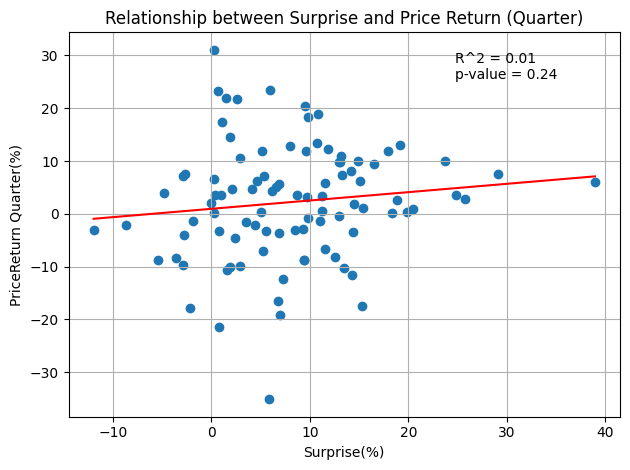

In [2]:
import pandas as pd
import yfinance as yf
import pytz
from datetime import datetime, timedelta, time

import requests
from bs4 import BeautifulSoup

def get_sp500_tickers_from_wikipedia():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

    response = requests.get(url)

    if response.status_code != 200:
        print("Failed to retrieve the web page. Status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table that contains the list of S&P 500 companies
    table = soup.find('table', {'class': 'wikitable sortable'})

    if not table:
        print("Failed to find the data table in the web page.")
        return []

    tickers = []

    # Extract the tickers from the table
    for row in table.findAll('tr')[1:]:  # skip the header row
        ticker = row.findAll('td')[0].text.strip()
        tickers.append(ticker)

    return tickers

if __name__ == "__main__":
    tickers = get_sp500_tickers_from_wikipedia()

def get_earnings_data(ticker):
    url = f"https://finance.yahoo.com/calendar/earnings?symbol={ticker}"
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to retrieve the web page. Status code:", response.status_code)
        return pd.DataFrame()  # return an empty dataframe

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table body that contains the earnings data
    tbody = soup.find('tbody')

    if not tbody:
        print("Failed to find the data table in the web page.")
        return pd.DataFrame()  # return an empty dataframe

    rows = tbody.find_all('tr', class_='simpTblRow')

    data = []

    for row in rows:
        ticker_element = row.find('a', attrs={"data-test": "quoteLink"})
        company_element = row.find('td', attrs={"aria-label": "Company"})
        earnings_date_element = row.find('td', attrs={"aria-label": "Earnings Date"})
        eps_estimate_element = row.find('td', attrs={"aria-label": "EPS Estimate"})
        reported_eps_element = row.find('td', attrs={"aria-label": "Reported EPS"})
        surprise_element = row.find('td', attrs={"aria-label": "Surprise(%)"})

        ticker = ticker_element.text if ticker_element else None
        company = company_element.text if company_element else None
        earnings_date = earnings_date_element.text if earnings_date_element else None
        eps_estimate = eps_estimate_element.text if eps_estimate_element else None
        reported_eps = reported_eps_element.text if reported_eps_element else None
        surprise = surprise_element.text if surprise_element else None

        data.append([ticker, company, earnings_date, eps_estimate, reported_eps, surprise])

    # Convert the list to a pandas DataFrame
    df = pd.DataFrame(data, columns=['Ticker', 'Company', 'Earnings Date', 'EPS Estimate', 'Reported EPS', 'Surprise(%)'])

    return df

dfs = {}  # Dictionary to store DataFrames

for ticker in tickers:
    df = get_earnings_data(ticker)  # Assume get_earnings_data returns a DataFrame for a given ticker
    if not df.empty:  # Check if the DataFrame is empty
        dfs[ticker] = df  # Store only non-empty DataFrames
        print(f"{ticker} done :)")
    else:
        print(f"{ticker} is empty, skipping.")

# To confirm labeling, you can also print the keys of the dictionary:
print("\nTickers stored in the dictionary:", ', '.join(dfs.keys()))

# need to fix time because of how many NaN or Nones there are.  Fucking fuck, and the NaNs
from datetime import datetime, timedelta, time
import pytz
from pandas.tseries.holiday import USFederalHolidayCalendar
import yfinance as yf

def augment_earnings_data(df, ticker):
    stock_data = yf.download(ticker, start="2000-01-01", end="2023-12-31")
    holidays = USFederalHolidayCalendar().holidays(start='2000-01-01', end='2023-12-31').date

    for index, row in df.iterrows():
        # Calculate Earnings Date and Next Market Open
        earnings_date_str = row['Earnings Date']
        timezone_format = "%b %d, %Y, %I %p" + ("EST" if "EST" in earnings_date_str else "EDT")
        tz = pytz.timezone('US/Eastern')

        earnings_date = datetime.strptime(earnings_date_str, timezone_format).replace(tzinfo=tz)

        if earnings_date.time() < time(9, 30):
            next_market_open = earnings_date.replace(hour=9, minute=30, second=0, microsecond=0)
        elif earnings_date.time() >= time(16, 0):
            next_market_open = earnings_date.replace(hour=9, minute=30, second=0, microsecond=0) + timedelta(days=1)
        else:
            next_market_open = earnings_date.replace(hour=9, minute=30, second=0, microsecond=0) + timedelta(days=1)

        while next_market_open.weekday() >= 5 or next_market_open.date() in holidays:
            next_market_open += timedelta(days=1)

        time_diff = next_market_open - earnings_date
        df.at[index, 'Hours Until Market Open'] = time_diff.total_seconds() / 3600

        # Fetch stock prices and calculate Price Returns
        if next_market_open.strftime('%Y-%m-%d') in stock_data.index:
            next_open_price = stock_data.loc[next_market_open.strftime('%Y-%m-%d')]['Open']
            next_close_price = stock_data.loc[next_market_open.strftime('%Y-%m-%d')]['Close']
            df.at[index, 'Next Open Price'] = next_open_price
            df.at[index, 'PriceReturn(%)'] = (next_close_price - next_open_price) / next_open_price * 100

            # For a week after earnings
            one_week_after = next_market_open + timedelta(weeks=1)
            if one_week_after.strftime('%Y-%m-%d') in stock_data.index:
                close_price_week = stock_data.loc[one_week_after.strftime('%Y-%m-%d')]['Close']
                df.at[index, 'PriceReturn Week(%)'] = (close_price_week - next_open_price) / next_open_price * 100

            # For a month after earnings
            one_month_after = next_market_open + timedelta(days=30)
            if one_month_after.strftime('%Y-%m-%d') in stock_data.index:
                close_price_month = stock_data.loc[one_month_after.strftime('%Y-%m-%d')]['Close']
                df.at[index, 'PriceReturn Month(%)'] = (close_price_month - next_open_price) / next_open_price * 100

            # For a quarter after earnings
            one_quarter_after = next_market_open + timedelta(days=90)
            if one_quarter_after.strftime('%Y-%m-%d') in stock_data.index:
                close_price_quarter = stock_data.loc[one_quarter_after.strftime('%Y-%m-%d')]['Close']
                df.at[index, 'PriceReturn Quarter(%)'] = (close_price_quarter - next_open_price) / next_open_price * 100

        # Calculate Earnings Growth (YoY and QoQ)
        if row['Reported EPS'] != "-":
            reported_eps = float(row['Reported EPS'])

            # QoQ growth
            if index + 1 < len(df) and df.iloc[index + 1]['Reported EPS'] != "-":
                last_quarter_eps = float(df.iloc[index + 1]['Reported EPS'])
                if abs(last_quarter_eps) > 1e-9:
                    df.at[index, 'Earnings Growth QoQ'] = (reported_eps - last_quarter_eps) / abs(last_quarter_eps) * 100
                else:
                    df.at[index, 'Earnings Growth QoQ'] = None

            # YoY growth
            if index + 4 < len(df) and df.iloc[index + 4]['Reported EPS'] != "-":
                last_year_eps = float(df.iloc[index + 4]['Reported EPS'])
                if abs(last_year_eps) > 1e-9:
                    df.at[index, 'Earnings Growth YoY'] = (reported_eps - last_year_eps) / abs(last_year_eps) * 100
                else:
                    df.at[index, 'Earnings Growth YoY'] = None

    df = df.dropna(subset=['Next Open Price'])

    # Convert relevant columns to correct data types
    df['Surprise(%)'] = df['Surprise(%)'].apply(lambda x: 0 if x == '-' else float(x.replace('+', '')))
    df['PriceReturn(%)'] = df['PriceReturn(%)'].astype(float)
    df['Hours Until Market Open'] = df['Hours Until Market Open'].astype(float)

    # Remove unwanted columns to avoid confusion
    columns_to_drop = ['Earnings Growth YoY (%)', 'PriceReturn 1-Month (%)', 'PriceReturn 1-Quarter (%)',
                       'PriceReturn 1 Week', 'PriceReturn 1 Month', 'PriceReturn 1 Quarter']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    return df

[*********************100%%**********************]  1 of 1 completed


C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surprise(%)'] = df['Surprise(%)'].apply(lambda x: 0 if x == '-' else float(x.replace('+', '')))
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceReturn(%)'] = df['PriceReturn(%)'].astype(float)
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:182: SettingWithCopyWarning: 
A value is trying to be set on a 

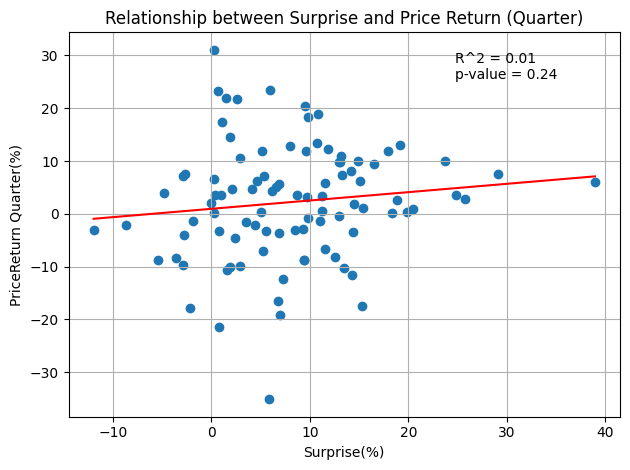

In [4]:
# REGRESSION AND PLOT LOOP.  REMEMBER TO SPLIT TRAIN / TEST, BECAUSE YOU NEED TO PROVE IT IS POSSIBLE TO RELY ON PAST RELATIONSHISP IF YUO WANNA USE THIS STRATEGY
dfMSFT = augment_earnings_data(dfs['MSFT'], "MSFT")
dfMSFT.dropna(subset=['Surprise(%)', 'PriceReturn Quarter(%)'], inplace=True)
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Extract the required columns
surprise = dfMSFT['Surprise(%)'].astype(float)
price_return = dfMSFT['PriceReturn Quarter(%)'].astype(float)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(surprise, price_return)

# Plot the data points
plt.scatter(surprise, price_return, label="_nolegend_")

# Plot the regression line
x = np.linspace(min(surprise), max(surprise), 100)
y = slope * x + intercept
plt.plot(x, y, color="red")

# Display R^2 and p-value on the plot
plt.text(0.7, 0.95, f"R^2 = {r_value**2:.2f}\np-value = {p_value:.2f}",
         transform=plt.gca().transAxes, verticalalignment='top')

# Labels and title
plt.xlabel("Surprise(%)")
plt.ylabel("PriceReturn Quarter(%)")
plt.title("Relationship between Surprise and Price Return (Quarter)")

# Adjust the grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surprise(%)'] = df['Surprise(%)'].apply(lambda x: 0 if x == '-' else float(x.replace('+', '')))
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceReturn(%)'] = df['PriceReturn(%)'].astype(float)
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:182: SettingWithCopyWarning: 
A value is trying to be set on a 

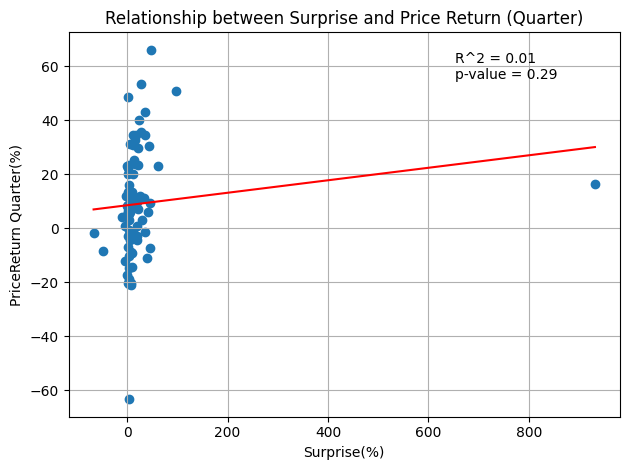

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

dfAAPL = augment_earnings_data(dfs['AAPL'], "AAPL")
dfAAPL.dropna(subset=['Surprise(%)', 'PriceReturn Quarter(%)'], inplace=True)

surprise = dfAAPL['Surprise(%)'].astype(float)
price_return = dfAAPL['PriceReturn Quarter(%)'].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(surprise, price_return)
plt.scatter(surprise, price_return, label="_nolegend_")
x = np.linspace(min(surprise), max(surprise), 100)
y = slope * x + intercept
plt.plot(x, y, color="red")
plt.text(0.7, 0.95, f"R^2 = {r_value**2:.2f}\np-value = {p_value:.2f}",
         transform=plt.gca().transAxes, verticalalignment='top')
plt.xlabel("Surprise(%)")
plt.ylabel("PriceReturn Quarter(%)")
plt.title("Relationship between Surprise and Price Return (Quarter)")
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surprise(%)'] = df['Surprise(%)'].apply(lambda x: 0 if x == '-' else float(x.replace('+', '')))
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceReturn(%)'] = df['PriceReturn(%)'].astype(float)
C:\Users\mjrsk\AppData\Local\Temp\ipykernel_23156\715209399.py:182: SettingWithCopyWarning: 
A value is trying to be set on a 

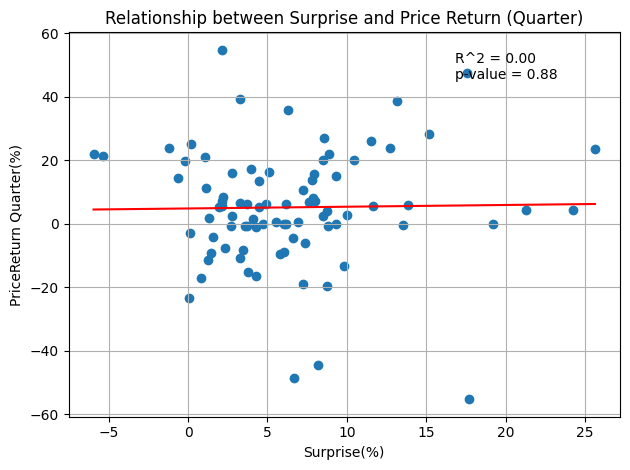

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

dfAAPL = augment_earnings_data(dfs['ADBE'], "ADBE")
dfAAPL.dropna(subset=['Surprise(%)', 'PriceReturn Quarter(%)'], inplace=True)

surprise = dfAAPL['Surprise(%)'].astype(float)
price_return = dfAAPL['PriceReturn Quarter(%)'].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(surprise, price_return)
plt.scatter(surprise, price_return, label="_nolegend_")
x = np.linspace(min(surprise), max(surprise), 100)
y = slope * x + intercept
plt.plot(x, y, color="red")
plt.text(0.7, 0.95, f"R^2 = {r_value**2:.2f}\np-value = {p_value:.2f}",
         transform=plt.gca().transAxes, verticalalignment='top')
plt.xlabel("Surprise(%)")
plt.ylabel("PriceReturn Quarter(%)")
plt.title("Relationship between Surprise and Price Return (Quarter)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
dfs['ADBE']

,Ticker,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),Hours Until Market Open,Next Open Price,PriceReturn(%),PriceReturn Week(%),Earnings Growth QoQ,Earnings Growth YoY,PriceReturn Quarter(%),PriceReturn Month(%)
0,ADBE,Adobe Inc,"Sep 12, 2024, 6 AMEDT",-,-,-,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADBE,Adobe Inc,"Jun 13, 2024, 6 AMEDT",-,-,-,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADBE,Adobe Inc,"Mar 13, 2024, 4 PMEDT",-,-,-,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADBE,Adobe Inc,"Mar 13, 2024, 6 AMEDT",-,-,-,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADBE,Adobe Inc,"Dec 13, 2023, 5 PMEST",4.14,-,-,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ADBE,Adobe Inc.,"Jun 14, 2001, 12 AMEDT",0.14,0.17,+18.15,9.5,19.85500,-1.762782,14.102247,0.000000,30.769231,NaN,NaN
96,ADBE,Adobe Inc.,"Mar 15, 2001, 12 AMEST",0.14,0.17,+17.55,9.5,13.62500,-8.256881,32.110092,0.000000,NaN,47.449542,NaN
97,ADBE,Adobe Inc.,"Dec 14, 2000, 12 AMEST",0.14,0.17,+17.68,9.5,29.25000,-2.029915,2.243590,21.428571,NaN,-55.341880,NaN
98,ADBE,Adobe Inc.,"Sep 14, 2000, 12 AMEDT",0.13,0.14,+8.75,9.5,31.78125,-1.376598,23.500492,7.692308,NaN,4.129794,NaN
